In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import h5py

%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [39]:
f = h5py.File('minosmatch_nukecczdefs_127x68_xuv_padded_me1Bmc_0000.hdf5', 'r')

for name in f:
    print name

eventids
hits-u
hits-v
hits-x
planecodes
segments
zs


In [40]:
data = {'zs': f['zs'], 'segments': f['segments'], 'planecodes': f['planecodes']}
df = DataFrame(data)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24999 entries, 0 to 24998
Data columns (total 3 columns):
planecodes    24999 non-null uint16
segments      24999 non-null uint8
zs            24999 non-null float32
dtypes: float32(1), uint16(1), uint8(1)
memory usage: 366.2 KB


In [42]:
print np.max(df['planecodes']), np.min(df['planecodes'])

66 0


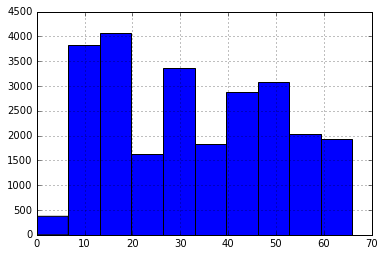

In [43]:
df['planecodes'][df['planecodes'] < 65535].hist()

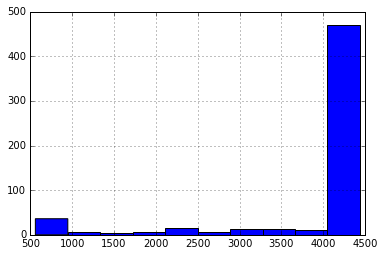

In [44]:
df['zs'][df['segments']==0].hist()

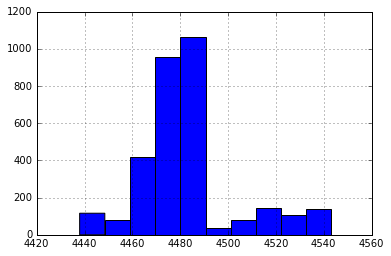

In [45]:
df['zs'][df['segments']==1].hist()

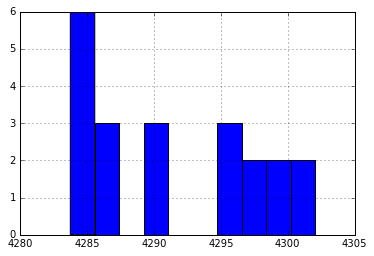

In [46]:
df['zs'][df['planecodes']==1].hist()

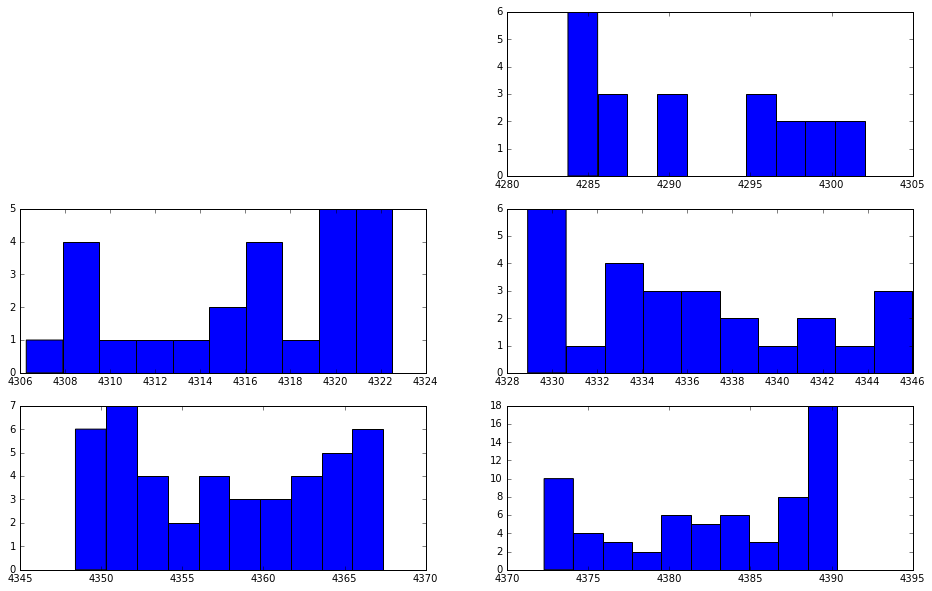

In [47]:
fig = plt.figure(figsize=(16, 10))
gs = plt.GridSpec(3, 2)
for i in range(1, 6):
    ax = plt.subplot(gs[i])
    ax.hist(df['zs'][df['planecodes']==i])

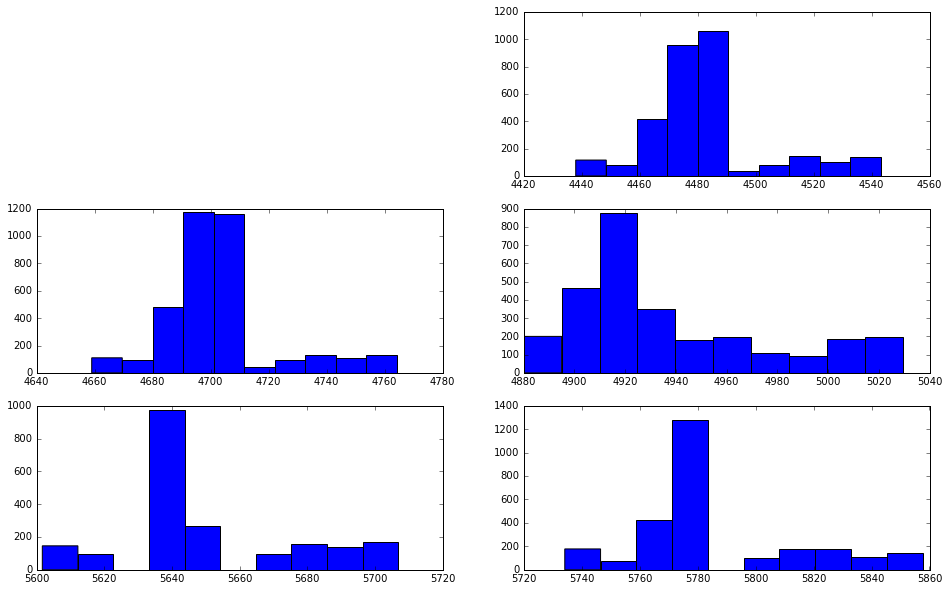

In [48]:
fig = plt.figure(figsize=(16, 10))
gs = plt.GridSpec(3, 2)
for i in range(1, 6):
    ax = plt.subplot(gs[i])
    ax.hist(df['zs'][df['segments']==i])

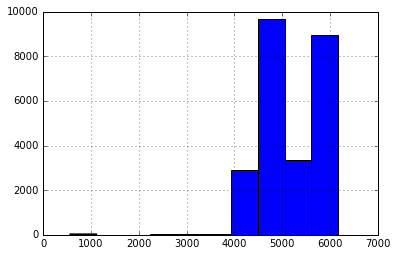

In [49]:
df['zs'].hist()

In [50]:
np.max(df['zs'][df['segments']==0])

4437.7798

In [51]:
# old style...
#target1_z = 4481.21
#target2_z = 4702.29
#target3_z = 4923.36
#target4_z = 5644.91
#target5_z = 5777.55
#target1_thickestW = 25.75
#target2_thickestW = 25.75
#target3_thickestW = 76.3
#target4_thickestW = 28.0
#target5_thickestW = 13.0
#
#extraToleranceUp=23.0
#extraToleranceDown=40.0
#
#targets_z = [target1_z, target2_z, target3_z, target4_z, target5_z]
#targets_w = [target1_thickestW, target2_thickestW, target3_thickestW, target4_thickestW, target5_thickestW]
#
#targets_zw = zip(targets_z, targets_w) 
#
#targets_bounds = [(t - w / 2.0 - extraToleranceUp, t + w / 2.0 + extraToleranceDown) for (t, w) in targets_zw]

In [52]:
target1_up_trk = 4437.83
target1_dn_trk = 4543.26

target2_up_trk = 4658.9
target2_dn_trk = 4764.33

target3_up_trk = 4879.98
target3_dn_trk = 5029.62

target4_up_trk = 5601.52
target4_dn_trk = 5706.95

target5_up_trk = 5734.17
target5_dn_trk = 5857.6
        
targets_bounds = [
    (target1_up_trk, target1_dn_trk),
    (target2_up_trk, target2_dn_trk),
    (target3_up_trk, target3_dn_trk),
    (target4_up_trk, target4_dn_trk),
    (target5_up_trk, target5_dn_trk),
]

In [53]:
for i, t in enumerate(targets_bounds):
    print i+1, t

1 (4437.83, 4543.26)
2 (4658.9, 4764.33)
3 (4879.98, 5029.62)
4 (5601.52, 5706.95)
5 (5734.17, 5857.6)


In [54]:
for i in range(11):
    print i, (np.min(df['zs'][df['segments']==i]), np.max(df['zs'][df['segments']==i]))

0 (560.13702, 4437.7798)
1 (4437.96, 4543.2202)
2 (4658.98, 4764.2598)
3 (4880.02, 5029.48)
4 (5601.6602, 5706.8799)
5 (5734.1802, 5857.5898)
6 (4543.2598, 4658.8701)
7 (4764.3901, 4879.9102)
8 (5029.7002, 5601.3901)
9 (5706.96, 5734.1099)
10 (5857.6099, 6172.25)


In [55]:
zsegs = [0, 1, 6, 2, 7, 3, 8, 4, 9, 5, 10]

In [56]:
for i in zsegs:
    print (np.min(df['zs'][df['segments']==i]), np.max(df['zs'][df['segments']==i]))

(560.13702, 4437.7798)
(4437.96, 4543.2202)
(4543.2598, 4658.8701)
(4658.98, 4764.2598)
(4764.3901, 4879.9102)
(4880.02, 5029.48)
(5029.7002, 5601.3901)
(5601.6602, 5706.8799)
(5706.96, 5734.1099)
(5734.1802, 5857.5898)
(5857.6099, 6172.25)


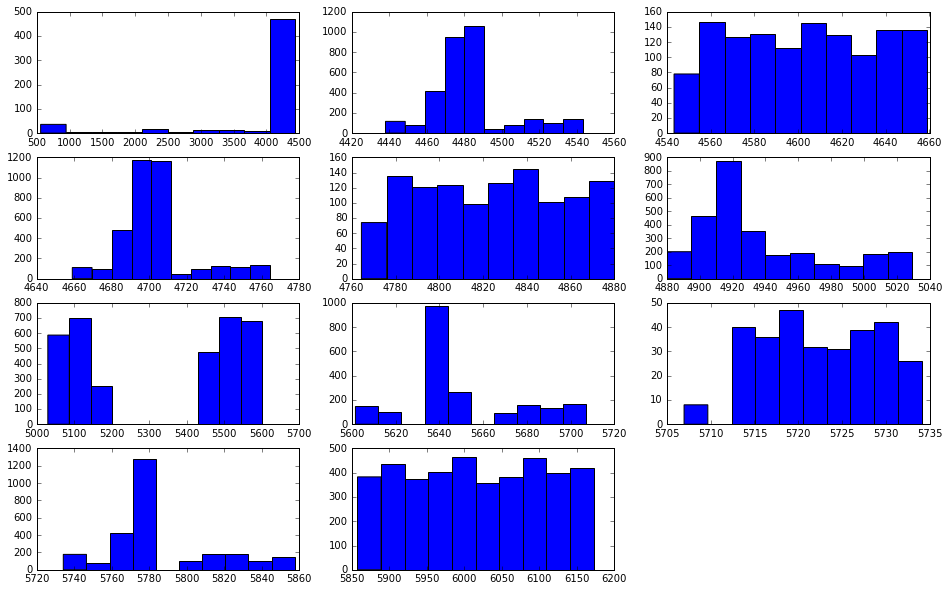

In [57]:
fig = plt.figure(figsize=(16, 10))
gs = plt.GridSpec(4, 3)
for i, v in enumerate(zsegs):
    ax = plt.subplot(gs[i])
    ax.hist(df['zs'][df['segments']==v])